# MF 796 Homework 2
Due: Wednesday, February 5, 2020 by 8 am.

U71725017

Chang Deng

dengc@bu.edu

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from pandas_datareader import data as pdr
import yfinance as yf
from sympy import *
from sympy import exp,pi
import time

# Problem  1:   Evaluation  of  a  known  integral  using  various  quadratures:   

In this problem   we are going to compute the price of a European call option with 3 month expiry, strike 12, and implied vol 20, Assume the underlying is 10 now and the interest rate is 4%.

1.	Use Black-Scholes formula to compute the price of the call analytically.

Using Black-Sholes formula, the price of the call is calculated by

$c_{0}=\Phi\left(d_{1}\right) S_{0}-\Phi\left(d_{2}\right) K e^{-r T}$

$\Phi(d)=\frac{1}{\sqrt{2 \pi}} \int_{-\infty}^{d} e^{- x^{2}/ 2 } d x$

$\begin{aligned} d_{1}=& \frac{1}{\sigma \sqrt{T}}\left(\ln \frac{S_{0}}{K}+\left(r+\frac{\sigma^{2}}{2}\right) T\right) \\ d_{2}=& d_{1}-\sigma \sqrt{T} \end{aligned}$

In [15]:
def calc_formula_price(S0,K,r,sigma,T):
    d1 = (np.log(S0 / K) + (r + (sigma ** 2) / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S0 * stats.norm.cdf(d1, 0, 1) - K * np.exp(-r*T) * stats.norm.cdf(d2, 0, 1)

In [16]:
S0,r,sigma,T,K = 10,0.04,0.2,3/12,12
fp = calc_formula_price(S0,K,r,sigma,T)
print(fp)

0.018815171090722893


As a result, the price is 0.018815171090722893.

2.	Calculate the price of the call numerically using the following 3 quadrature methods:
(a)	Left Riemann rule
(b)	Midpoint rule
(c)	Gauss nodes of your choice (say explicitly why you made that choice)
with the number of nodes N = 5, 10, 50, 100 and compute the calculation error as a function of N for each of the methods.

$\Phi(d)=\int_{-\infty}^{d} \frac{e^{-\left(\frac{x^{2}}{2}\right)}}{\sqrt{2 \pi}} d x$,and in this case,$f(x)=\frac{e^{-\left(\frac{x^{2}}{2}\right)}}{\sqrt{2 \pi}}$ for all 3 quadrature methods.
The calculation error of 3 quadrature methods to N are shown below.

Here we choose np.polynomial.legendre.leggauss to generate the Gauss nodes.

In [17]:
def left_Riemann_sum(a,b,N,func):
    '''
    :param a: left point
    :param b: right point
    :param N: number of nodes
    :return:
    '''
    w = (b-a)/N
    sum = 0
    for i in np.arange(1,N+1,1):
        x = a + (i-1)*(b-a)/N
        sum += w*(func(x))
    return sum

def midpoint_Riemann_sum(a,b,N,func):
    '''
        :param a: left point
        :param b: right point
        :param N: number of nodes
        :return:
        '''
    w = (b - a) / N
    sum = 0
    for i in np.arange(1, N + 1, 1):
        x = a + (i - 1) * (b - a) / N + 0.5*(b - a)/N
        sum += w * (func(x))
    return sum

def gauss_node(a,b,N,func):
    x, w = np.polynomial.legendre.leggauss(N) #defauly interval in [-1,1], outcome w and x need to adjust accodring to [a,b]
    w = w * (b-a)/2 # (b-a)/(1-(-1))
    x = (x+1)*(b-a)/2 + a # x+1 -> [0,2] -> (x+1)*(b-a)/2 -> [0,b-a] -> (x+1)*(b-a)/2 +a -> [a,b]
    sum = 0
    for i in np.arange(0, N, 1):
        sum += func(x[i])*w[i]
    return sum

In [18]:
lower = 0 - 7 * 1  # standard normal distribution
fn = lambda x: np.exp((-1 / 2) * x ** 2) / np.sqrt(2 * np.pi)

In [19]:
d1 = (np.log(S0 / K) + (r + (sigma ** 2) / 2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)
le_n = []
mid_n = []
gauss_n = []

In [20]:
for n in [5,10,50,100]:
    c1 = S0 * left_Riemann_sum(lower, d1, n, fn) - K * np.exp(-r * T) * left_Riemann_sum(lower, d2, n, fn)
    le_n.append(abs(fp - c1))
    c2 = S0 * midpoint_Riemann_sum(lower, d1, n, fn) - K * np.exp(-r * T) * midpoint_Riemann_sum(lower, d2, n, fn)
    mid_n.append(abs(fp - c2))
    c3 = S0 * gauss_node(lower, d1, n, fn) - K * np.exp(-r * T) * gauss_node(lower, d2, n, fn)
    gauss_n.append(abs(fp - c3))

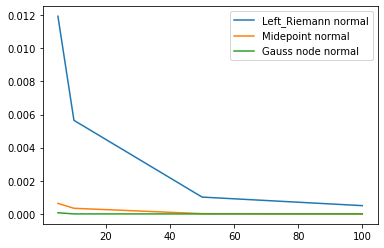

In [21]:
plt.plot([5, 10, 50, 100], le_n, label='Left_Riemann normal')
plt.plot([5, 10, 50, 100], mid_n, label='Midepoint normal')
plt.plot([5, 10, 50, 100], gauss_n, label='Gauss node normal')
plt.legend()
plt.show()

Approximation above invovle estimating $\Phi\left(d_{1}\right)$ and $\Phi\left(d_{2}\right)$ separately. However, by solving Black-Shole formula we have $S_T  = S_0 e^{(r-\frac{1}{2}\sigma^2)t +\sigma W_t} $

In that sense, $ln(S_T/S_0) \sim N((r-\frac{1}{2}\sigma^2)T, \sigma^2T), so $(S_T/S_0) is log-normal distribution where $f(x) = \frac{1}{u\sigma\sqrt{2\pi}} e^{-\frac{(log(u)-\mu)^2}{2\sigma^2}}$ for all 3 quadrature methods.

In [22]:
u = (r - (sigma ** 2) / 2) * T
s = sigma * np.sqrt(T)
mu = np.exp(u + (s ** 2) / 2)
v = np.sqrt(np.exp(2 * mu + s ** 2) * (np.exp(s ** 2) - 1))

In [23]:
left = K/S0
right = mu + 3*v
le = []
mid = []
gauss = []

In [24]:
f = lambda x : (x*S0 - K)*np.exp(-(np.log(x)-u)**2/(2*(s**2)))/(x*s*np.sqrt(2*np.pi))

In [25]:
for n in [5,10,50,100]:
    le.append(abs(fp - left_Riemann_sum(left,right,n,f)*np.exp(-r*T)))
    mid.append(abs(fp - midpoint_Riemann_sum(left,right,n,f)*np.exp(-r*T)))
    gauss.append(abs(fp - gauss_node(left,right,n,f)*np.exp(-r*T)))

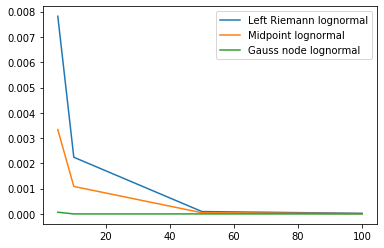

In [26]:
plt.plot([5,10,50,100],le,label='Left Riemann lognormal')
plt.plot([5,10,50,100],mid,label='Midpoint lognormal')
plt.plot([5, 10, 50, 100], gauss,label='Gauss node lognormal')
plt.legend()
plt.show()

As N becomes large, the calculation error of particular method under different distribution is close, so we only apply lognormal distribution for the following problem.

3.	Estimate the experimental rate of convergence of each method and compare it with the known theoretical estimate.

In [27]:
N_list = np.arange(5, 100, 1)
Left_Error_list = []
Mid_Error_list = []
Gauss_Error_list = []

On2_list = []
On3_list = []
Onn_list = []
On2n_list = []

In [28]:
for n in N_list:
    Left_Error_list.append(abs(fp - left_Riemann_sum(left, right, n,f) * np.exp(-r * T)))
    Mid_Error_list.append(abs(fp - midpoint_Riemann_sum(left,right,n,f)*np.exp(-r*T)))
    
    On2_list.append((1 / (n ** 2)) * (right - left) ** 3)
    On3_list.append((1 / (n ** 3)) * (right - left) ** 3)

(a) Left Riemann rule

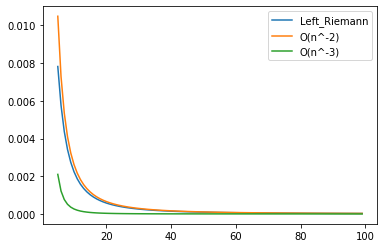

In [29]:
plt.plot(N_list,Left_Error_list,label ='Left_Riemann')
plt.plot(N_list,On2_list,label='O(n^-2)')
plt.plot(N_list, On3_list, label='O(n^-3)')
plt.legend()
plt.show()

(b) Midpoint rule

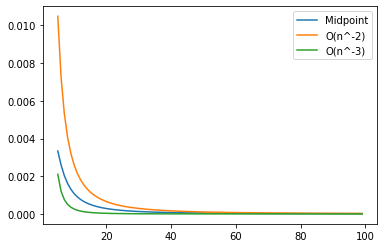

In [30]:
plt.plot(N_list, Mid_Error_list, label='Midpoint')
plt.plot(N_list, On2_list, label='O(n^-2)')
plt.plot(N_list, On3_list, label='O(n^-3)')
plt.legend()
plt.show()

(c) Gauss nodes of your choice (say explicitly why you made that choice)

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in long_scalars
  after removing the cwd from sys.path.


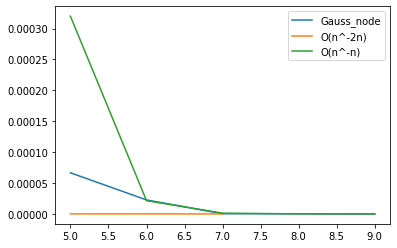

In [31]:
N_list = np.arange(5, 10, 1)
for n in N_list:
    Gauss_Error_list.append(abs(fp - gauss_node(left, right, n,f) * np.exp(-r * T)))
    On2n_list.append(1/(n**(2*n))) 
    Onn_list.append(1 / (n ** (n)))
plt.plot(N_list, Gauss_Error_list, label='Gauss_node')
plt.plot(N_list, On2n_list, label='O(n^-2n)')
plt.plot(N_list, Onn_list, label='O(n^-n)')
plt.legend()
plt.show()

As shown above, the Left Reimann's rate of convergence of O(N^-2), and the Mid Point's  rate of convergence is O(N^-2), and the Gaussian's rate of convergence is N(N^-N)

4.	Which method is your favorite and why?

The Gauss nodes method is my favorite because its calculation error is relatively small under small N compared to other two methods and its rate of convergence is faster, meaning that you may come out accurate approximation under limited N.

# Problem 2: Calculation of  Contingent  Options:  
Let S1  be a random variable that takes on  the value of SPY one year from now and let S2 take on the values of SPY 6 months from now. Assume that they are jointly normally distributed with
$\sigma_{1}=20$
$\sigma_{2}=15$
$\rho=0.95$

By $\rho$ here we mean correlation between S1 and S2. Also, assume that interest rate is zero. Please specify where you got the current price of the underlying.


1.	Evaluate the price of the one year call on SPY with the strike K1 = 370. This is an example of a vanilla option.

Given S1 and S2 are jointly normally distributed with
$\sigma_{1}=20$
$\sigma_{2}=15$
$\rho=0.95$
the density function of jointly normal distribution is

$f(x, y)=\left(2 \pi \sigma_{1} \sigma_{2} \sqrt{1-\rho^{2}}\right)^{-1} \exp \left[-\frac{1}{2\left(1-\rho^{2}\right)}\left(\frac{\left(x-\mu_{1}\right)^{2}}{\sigma_{1}^{2}}-\frac{2 \rho\left(x-\mu_{1}\right)\left(y-\mu_{2}\right)}{\sigma_{1} \sigma_{2}}+\frac{\left(y-\mu_{2}\right)^{2}}{\sigma_{2}^{2}}\right)\right]$

while the two marginal distributions are all normal distribution that

$f(x)=\frac{1}{\sqrt{2 \pi} \sigma} e^{-\frac{(x-\mu)^{2}}{2 \sigma^{2}}}$

In [32]:
spy = pdr.get_data_yahoo('SPY')
S0 = spy.loc[:,'Close'][-1]
print(S0)

247.74000549316406


Through yfinance I acquier the current price of the underlying(SPY) given by yahoo finance website, which is 329.05999755859375 on Feb,4th,2020.

In [33]:
sigmax = 20
rho = 0.95
r = 0
Tx = 1
Kx = 370

In [34]:
ux = S0 * np.exp(r * Tx)
vx = sigmax

In [35]:
fx = lambda x: (x - Kx) * np.exp(-(x - ux) ** 2 / (2 * vx ** 2)) / (np.sqrt(2 * np.pi) * vx)
left_x = Kx
right_x = ux + 7*vx
X = gauss_node(left_x,right_x,100,fx)*np.exp(-r*Tx)
print(X)

1.4972720338882645e-09


So the price of the one year call on SPY with the strike K1 = 370 is 0.14958482340672705.

2.	Evaluate the price of the one year call on SPY with the strike K1 = 370, contingent on SPY at 6 months being below 365. This is a contingent option.

In [36]:
# def double_gauss_node_outer(a,b,c,d,N,func):
#     z1 = Symbol('z1')
#     x, w = np.polynomial.legendre.leggauss(N)
#     w = w * (b - a) / 2
#     x = (x + 1) * (b - a) / 2 + a
#     sum = 0
#     for i in np.arange(0, N, 1):
#         f = func.subs(z1, x[i])
#         result = double_gauss_node_inner(c,d,N,f)
#         sum += result * w[i]
#     sum = sum.subs(pi,np.pi)
#     return sum

In [37]:
# def double_gauss_node_inner(a,b,N,func):
#     z2 = Symbol('z2')
#     x, w = np.polynomial.legendre.leggauss(N)
#     w = w * (b - a) / 2
#     x = (x + 1) * (b - a) / 2 + a
#     sum = 0
#     for i in np.arange(0, N, 1):
#         f = func.subs(z2, x[i])
#         sum += f * w[i]
#     return sum

In [45]:
def double_gauss_node(a,b,N,func,*args):
    x, w = np.polynomial.legendre.leggauss(N)
    w = w * (b - a) / 2
    x = (x + 1) * (b - a) / 2 + a
    sum = 0
    if args:
        sum = np.sum(np.array([func(args[0],xi) for xi in x]*w))
    else:
        sum = np.sum(np.array([func(xi) for xi in x]*w))
    return sum

In [61]:
def contingent_option(rho=0.95,Ky=365):
    spy = pdr.get_data_yahoo('SPY')
    S0 = spy.loc[:,'Close'][-1]
    #S0 =325
    sigmax = 20
    sigmay = 15
    rho = rho
    r = 0
    Tx = 1
    Ty = 0.5
    Kx = 370
    Ky = Ky
    ux = S0 * np.exp(r * Tx)
    uy = ux
    vx = sigmax
    vy = sigmay
    
    left_x = Kx
    right_x = ux + 7*vx
    
    left_y = ux - 7*vy
    right_y = Ky
    #z1 = Symbol('z1')
    #z2 = Symbol('z2')
    #fxy = (z1 - Kx) * exp(((z1-ux)**2/(vx**2) + (z2-uy)**2/(vy**2) - 2*rho*(z1-ux)*(z2-uy)/(vx*vy))/(-2*(1-rho**2)))\
    #      /(2*pi*vx*vy*np.sqrt(1-rho**2))
    #X = double_gauss_node_outer(left_x,right_x,left_y,right_y,100,fxy)
    inner_fun = lambda x,y : (x - Kx) * np.exp(((x-ux)**2/(vx**2) + (y-uy)**2/(vy**2) - 2*rho*(x-ux)*(y-uy)/(vx*vy))/(-2*(1-rho**2)))\
          /(2*np.pi*vx*vy*np.sqrt(1-rho**2))
    outer_fun = lambda x: double_gauss_node(left_y,right_y,100,inner_fun,x)
    X = double_gauss_node(left_x,right_x,100,outer_fun)
    return X

In [62]:
contingent_option()

0.0397572096931111

So the price of the one year call on SPY with the strike K1 = 370, contingent on SPY at 6 months being below 365 is 0.0570287431029557.

3.	Calculate the contingent option again, but with ρ = 0.8, ρ = 0.5, and ρ = 0.2.

In [63]:
rho_list = [0.2, 0.5, 0.8]
price = []
for r in rho_list:
    price.append(contingent_option(rho=r))
print(price)

[0.083269168772275, 0.0775216935250535, 0.059758138495458565]


The price of the contingent option with ρ = 0.8, ρ = 0.5, and ρ = 0.2 is 0.0947796809845079, 0.131281546404219 and 0.145123965330501.

4.	Does dependence on ρ make sense?

Yes, the higher the dependence ρ is, the higher the correlation between S1 and S2. Then if SPY at 6 months is below 365 given K1 = 370 and current price of SPY under 370, the higher the correlation between S1 and S2, the less possibly the price of SPY at 1 year will be higher than K1. So the price of option will be negatively related to ρ.

5.	Calculate the contingent option again, but with SPY at 6 months below 360, 350, and 340.

In [79]:
Ky_list = [340, 350, 360]
price = []
for k in Ky_list:
    price.append(contingent_option(Ky=k))
print(price)

[2.03005104528239e-7, 0.000395352623104485, 0.0215870231113161]


The price of the contingent option with SPY at 6 months below 360, 350, and 340 is 0.0215870231113161, 0.000395352623104485 and 2.03005104528239e-7.

6.	Does the dependence on the 6 month value make sense?

Yes,under given correlation between S1 and S2, plus current value of SPY below K1 = 370, the higher the 6 month value, the more possibly the price of SPY at 1 year will be higher than K1. So the price of option will be positively related to the 6 month value.

7.	Under what conditions do you think the price of the contingent option will equal the price of the vanilla one?

According to the dependence on ρ and the 6 month value mentioned above,there are serval conditions under which the price of the contingent option will equal the price of the vanilla one.

a) when S1 and S2 are highly positively related, the higher the 6 month value, the closer the price of the contingent option toward the price of the vanilla one.

In [80]:
Ky_list = [370, 400, 430, 460, 490]
price = []
for k in Ky_list:
    price.append(contingent_option(Ky=k))
print(price)
print(X)

[0.0965612589597252, 0.149525539068984, 0.149584822715697, 0.149584823406727, 0.149584823406728]
0.14958482340672705


b) when S1 and S2 are highly negatively related, the lower the 6 month value, the closer the price of the contingent option toward the price of the vanilla one

In [81]:
Ky_list = [250, 280, 310, 340, 370]
price = []
for k in Ky_list:
    price.append(contingent_option(rho=-0.95,Ky=k))
print(price)
print(X)

[4.25336969094275e-6, 0.0140767875349622, 0.149457077794480, 0.149584823319029, 0.149584823319029]
0.14958482340672705


c) when S1 and S2 are not related, the higher the 6 month value shall be away from the current price of SPY, the closer the price of the contingent option toward the price of the vanilla one

In [82]:
Ky_list = [S0-60, S0-30, S0, S0+30, S0+60]
price = []
for k in Ky_list:
    price.append(contingent_option(rho=0,Ky=k))
print(price)
print(X)

[4.73753692523834e-6, 0.00340307446975660, 0.0747924117031714, 0.146181748936588, 0.149580085869419]
0.14958482340672705
